In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/Desktop/Project/dataset.csv')

df.fillna(df.mean(numeric_only=True), inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Desktop/Project/dataset.csv'

India: R^2 = 0.9989, MSE = 90290.2529
Training Data - India:
Actual Values: [1107939.87, 1126890.377, 1145638.789, 1163638.637, 1181108.939, 1198274.68, 1215194.931, 1232085.388, 1249141.852, 1266100.53, 1282873.899, 1299390.228, 1315102.79, 1330630.219, 1346642.46, 1361748.899, 1376257.714, 1389966.387]
Predicted Values: [1107890.210206545, 1126986.5526158442, 1145703.118756585, 1163690.6710569167, 1181060.4312884721, 1198134.4866330253, 1215026.2564402146, 1232097.9262085024, 1249193.860546449, 1266163.4421182005, 1282895.2728814324, 1299449.5776349204, 1315041.5032290488, 1330818.2226269513, 1346702.260464735, 1361597.4418077534, 1376127.715003252, 1390047.6394811512]

Test Data - India:
Actual Values: [1389966.387, 1402807.867, 1412319.817]
Predicted Values: [1390047.6394811512, 1402365.8159374564, 1412057.4057749086]

Forecast Data - India:
Forecasted Values: [1412057.4057749086, 1422046.0137699922, 1435233.6784145124, 1448198.3035818369, 1460991.0546443104, 1473436.5347852428, 14

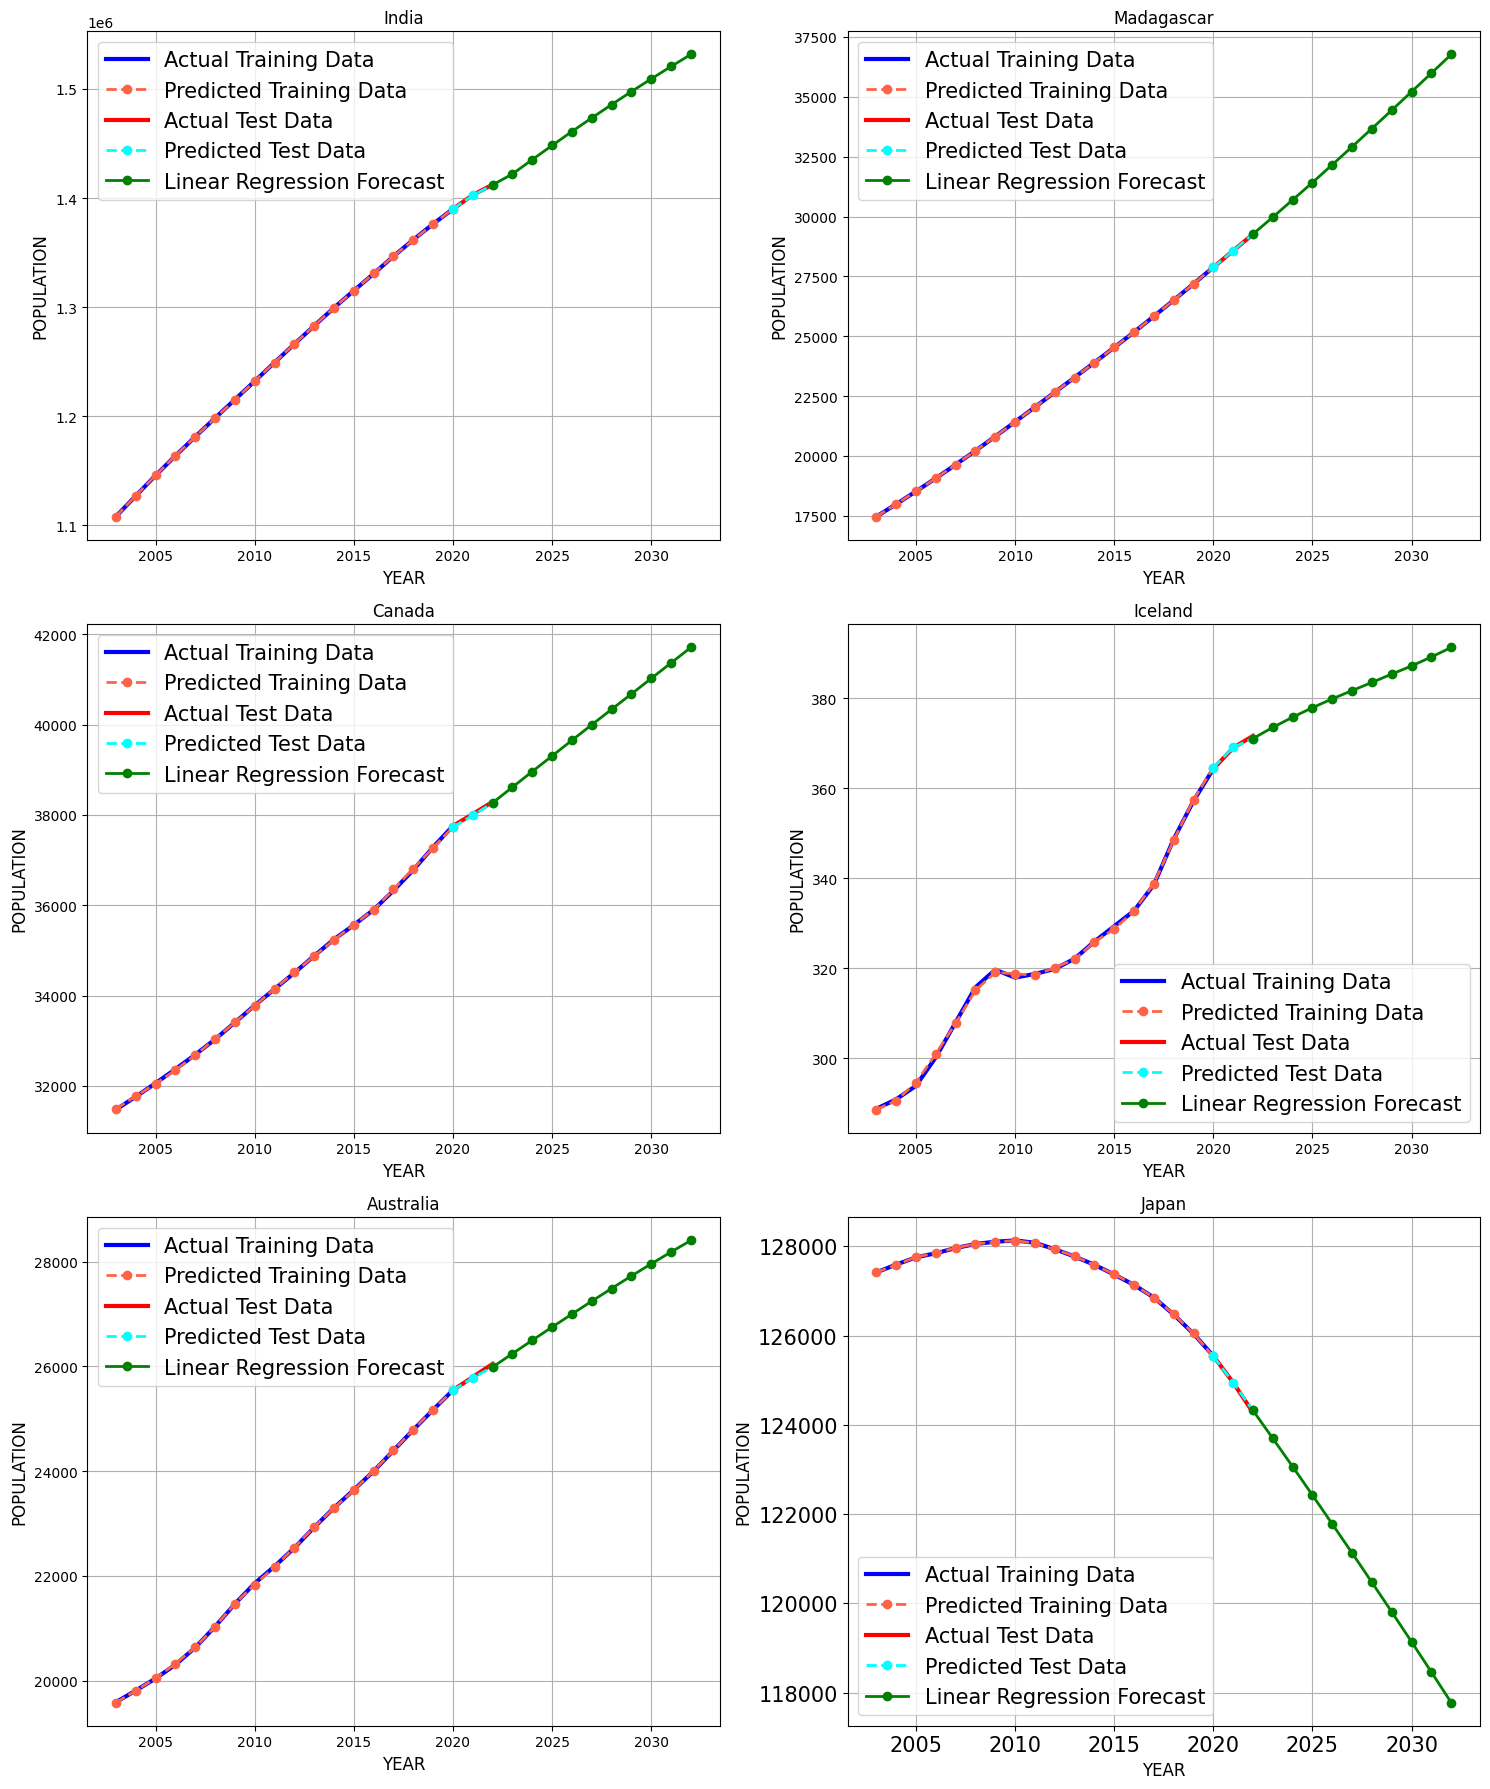

   Location  Time  Population_Prediction
0     India  2022           1.412057e+06
1     India  2023           1.422046e+06
2     India  2024           1.435234e+06
3     India  2025           1.448198e+06
4     India  2026           1.460991e+06
..      ...   ...                    ...
61    Japan  2028           1.204689e+05
62    Japan  2029           1.198055e+05
63    Japan  2030           1.191357e+05
64    Japan  2031           1.184582e+05
65    Japan  2032           1.177748e+05

[66 rows x 3 columns]


In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

countries_to_keep = ['India', 'Madagascar', 'Canada', 'Iceland', 'Australia', 'Japan']
df = df[df['Location'].isin(countries_to_keep)]

df_train = df[(df['Time'] >= 2003) & (df['Time'] <= 2020)]
df_test = df[(df['Time'] >= 2020) & (df['Time'] <= 2022)]
df_predict = df[(df['Time'] >= 2022) & (df['Time'] <= 2032)]

population_column = 'TPopulation1Jan'

additional_features = ['CBR', 'CDR', 'PopDensity', 'Under5Deaths', 'LEx', 'TFR']

predictions_df = pd.DataFrame(columns=['Location', 'Time', 'Population_Prediction'])

#fig, ax = plt.subplots(3, 2, figsize=(13,13))
fig, ax = plt.subplots(3, 2, figsize=(15, 18))
ax = ax.flatten()

for i, country in enumerate(countries_to_keep):
    country_train_data = df_train[df_train['Location'] == country]
    country_test_data = df_test[df_test['Location'] == country]
    country_predict_data = df_predict[df_predict['Location'] == country]

    X_train = country_train_data[additional_features]
    y_train = country_train_data[population_column]

    X_test = country_test_data[additional_features]
    y_test = country_test_data[population_column]

    X_predict = country_predict_data[additional_features]

    model = LinearRegression()
    model.fit(X_train, y_train)

    
    r2 = r2_score(y_test, model.predict(X_test))
    mse = mean_squared_error(y_test, model.predict(X_test))
    
    print(f"{country}: R^2 = {r2:.4f}, MSE = {mse:.4f}")

    
    train_predictions = model.predict(X_train)
    print(f"Training Data - {country}:\nActual Values: {list(y_train)}\nPredicted Values: {list(train_predictions)}\n")
    
    test_predictions = model.predict(X_test)
    print(f"Test Data - {country}:\nActual Values: {list(y_test)}\nPredicted Values: {list(test_predictions)}\n")
   
    forecast_values = model.predict(X_predict)
    print(f"Forecast Data - {country}:\nForecasted Values: {list(forecast_values)}\n")
    
    

    country_predictions = pd.DataFrame({
        'Location': [country] * len(country_predict_data),
        'Time': country_predict_data['Time'],
        'Population_Prediction': forecast_values
    })

    predictions_df = pd.concat([predictions_df, country_predictions], ignore_index=True)
    
    ax[i].plot(country_train_data['Time'], y_train, label='Actual Training Data', linewidth=3, linestyle='-', color='blue')
    ax[i].plot(country_train_data['Time'], train_predictions, label='Predicted Training Data', linewidth=2, linestyle='--', color='tomato', marker='o')
    ax[i].plot(country_test_data['Time'], y_test, label='Actual Test Data', linewidth=3, linestyle='-', color='red')
    ax[i].plot(country_test_data['Time'], test_predictions, label='Predicted Test Data', linewidth=2, linestyle='--', color='cyan', marker='o')
    ax[i].plot(country_predict_data['Time'], forecast_values, label='Linear Regression Forecast', linewidth=2, linestyle='-', color='green', marker='o')
    ax[i].set_title(country)
    ax[i].set_xlabel('YEAR', fontsize=12)
    ax[i].set_ylabel('POPULATION', fontsize=12)
    ax[i].legend(fontsize=15)
    ax[i].grid()

plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

print(predictions_df)
